In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

import time

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [15]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = "https://api.openweathermap.org/data/2.5/weather?" + "&q=" + "i" + "&APPID="+weather_api_key

In [17]:
# Loop through all the cities in the list.
set_count = 1
record_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = "https://api.openweathermap.org/data/2.5/weather?" + "&q=" + city.replace(" ","+") + "&APPID="+weather_api_key

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | portland
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | nanortalik
Processing Record 6 of Set 1 | airai
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | uyuni
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | san cristobal
Processing Record 11 of Set 1 | singaraja
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | coihaique
Processing Record 14 of Set 1 | borba
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | grand centre
City not found. Skipping...
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | cap malheureux
Processing Record 20 of Set 1 | abu kamal
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | nishihara
Processing Record 23 

Processing Record 35 of Set 4 | palmerston
Processing Record 36 of Set 4 | gobabis
Processing Record 37 of Set 4 | bacolod
Processing Record 38 of Set 4 | dhidhdhoo
Processing Record 39 of Set 4 | dor marunt
Processing Record 40 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 41 of Set 4 | tougue
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | champerico
Processing Record 44 of Set 4 | claveria
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | rocha
Processing Record 47 of Set 4 | olafsvik
Processing Record 48 of Set 4 | mareeba
Processing Record 49 of Set 4 | albany
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | uwayl
City not found. Skipping...
Processing Record 2 of Set 5 | yuzhou
Processing Record 3 of Set 5 | dongying
Processing Record 4 of Set 5 | courtalam
City not found. Skipping...
Processing Record 5 of Set 5 | khasan
Processing Record 6 of Set 5 | cermik
Processing Record 7 of Set 5 | 

Processing Record 25 of Set 8 | vao
Processing Record 26 of Set 8 | chernyshevskiy
Processing Record 27 of Set 8 | margate
Processing Record 28 of Set 8 | bilma
Processing Record 29 of Set 8 | calabozo
Processing Record 30 of Set 8 | yangambi
Processing Record 31 of Set 8 | chadiza
Processing Record 32 of Set 8 | brokopondo
Processing Record 33 of Set 8 | dodge city
Processing Record 34 of Set 8 | sao miguel do guama
Processing Record 35 of Set 8 | atbasar
Processing Record 36 of Set 8 | edson
Processing Record 37 of Set 8 | tateyama
Processing Record 38 of Set 8 | talnakh
Processing Record 39 of Set 8 | mbekenyera
Processing Record 40 of Set 8 | barrafranca
Processing Record 41 of Set 8 | najran
Processing Record 42 of Set 8 | bondo
Processing Record 43 of Set 8 | nianzishan
Processing Record 44 of Set 8 | torbay
Processing Record 45 of Set 8 | ust-kut
Processing Record 46 of Set 8 | edd
Processing Record 47 of Set 8 | milledgeville
Processing Record 48 of Set 8 | clive
Processing Rec

Processing Record 15 of Set 12 | iquitos
Processing Record 16 of Set 12 | kostomuksha
Processing Record 17 of Set 12 | la ronge
Processing Record 18 of Set 12 | papasquiaro
City not found. Skipping...
Processing Record 19 of Set 12 | yozgat
Processing Record 20 of Set 12 | panji
Processing Record 21 of Set 12 | balao
Processing Record 22 of Set 12 | tomatlan
Processing Record 23 of Set 12 | lamar
Processing Record 24 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 25 of Set 12 | bilibino
Processing Record 26 of Set 12 | salinopolis
Processing Record 27 of Set 12 | le mars
Processing Record 28 of Set 12 | arlit
Processing Record 29 of Set 12 | naze
Processing Record 30 of Set 12 | dongsheng
Processing Record 31 of Set 12 | kisangani
Processing Record 32 of Set 12 | lamu
Processing Record 33 of Set 12 | upplands-vasby
City not found. Skipping...
Processing Record 34 of Set 12 | bethlehem
Processing Record 35 of Set 12 | xiaoweizhai
Processing Record 36 of Set 12 | nioro

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,297.15,94,20,3.10,TO,2020-08-22 20:12:03
1,Portland,45.52,-122.68,297.59,60,75,3.60,US,2020-08-22 20:10:46
2,Chuy,-33.70,-53.46,286.15,57,0,2.40,UY,2020-08-22 20:12:04
3,Nanortalik,60.14,-45.24,282.04,69,12,1.39,GL,2020-08-22 20:12:05
4,Airai,-8.93,125.41,287.57,39,46,1.66,TL,2020-08-22 20:07:52
5,Uyuni,-20.46,-66.83,284.88,28,2,11.67,BO,2020-08-22 20:12:06
6,Barrow,71.29,-156.79,279.15,87,90,10.30,US,2020-08-22 20:12:07
7,San Cristobal,7.77,-72.22,307.15,36,40,9.30,VE,2020-08-22 20:10:34
8,Singaraja,-8.11,115.09,298.55,70,12,1.46,ID,2020-08-22 20:10:06
9,Ushuaia,-54.80,-68.30,280.15,83,40,7.70,AR,2020-08-22 20:10:32


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

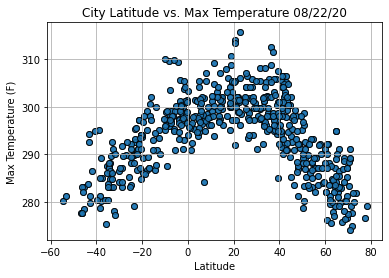

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

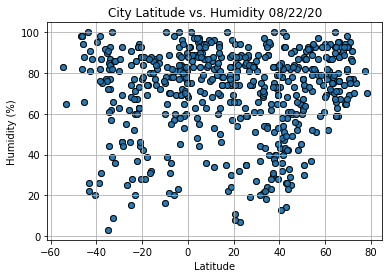

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

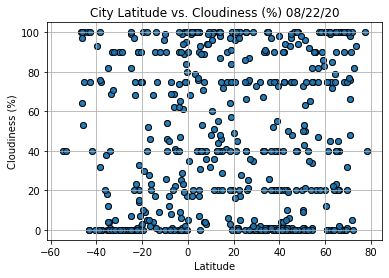

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()